In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

import importlib
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass


In [2]:
def exp_decay_fit(xdata, ydata, start, stop, num):
    from scipy.optimize import curve_fit
    def exp_decay(x, A, B, C):
        return A * np.exp(-(x/B)) + C
    popt, pcov = curve_fit(exp_decay, xdata, ydata)
    xfit = np.linspace(start, stop, num)
    yfit = exp_decay(xfit, popt[0], popt[1], popt[2])
    return popt, xfit, yfit
    
def lin_fit(xdata, ydata, start, stop, num):
    from scipy.optimize import curve_fit
    def lin(x, A, B):
        return A * x + B
    popt, pcov = curve_fit(lin, xdata, ydata)
    xfit = np.linspace(start, stop, num)
    yfit = lin(xfit, popt[0], popt[1])
    return popt, xfit, yfit

def Ek_fit(xdata, ydata, start, stop, num, p0 = None):
    from scipy.optimize import curve_fit
    def Ek(x, A, B):
        return A * (1 - np.exp(-(x/B)))
    popt, pcov = curve_fit(Ek, xdata, ydata, p0 = p0)
    xfit = np.linspace(start, stop, num)
    yfit = Ek(xfit, popt[0], popt[1])
    return popt, xfit, yfit

def sigmoid_fit(xdata, ydata, start, stop, num):
    from scipy.optimize import curve_fit
    def sigmoid(x, A, B, C, D):
        return A / (1 + np.exp(-B * (x - C))) + D

    popt, pcov = curve_fit(sigmoid, xdata, ydata)
    xfit = np.linspace(start, stop, num)
    yfit = sigmoid(xfit, popt[0], popt[1], popt[2])
    return popt, xfit, yfit
    

In [3]:
importlib.reload(ExperimentClass)
manip = ExperimentClass.Experiment("20230321_Ek_FvFm_Sinus", "JTS", local = "IBPC" , diff_xaxis = True)

In [4]:
manip.get_annotations()

,Record,Status,Freq,Offset
0,176,ok,1.0,0.30
1,177,pics,1.0,0.30
2,178,rate,1.0,0.30
3,179,ok,1.0,0.30
4,180,ok,1.0,0.30
...,...,...,...,...
91,267,pics,2.0,0.08
92,268,ok,2.0,0.08
93,269,ok,2.0,0.08
94,270,pics,2.0,0.08


In [5]:
ECS_flash_list = ["E11", "E12", "E13", "E14", "E20"]
ECS_pulse_list = ["E28", "E29", "E30","E35"]
Vitesse_photochimie_JTS_list = ["E41","E42","E45","E46","E47","E50","E51","E52","E55","E56","E57","E60"]
Vitesse_photochimie_PWM_list = ["E118", "E119", "E120", "E121", "E124", "E125", "E126", "E127", "E128", "E129", 
                                "E130", "E131", "E132", "E133"]
FvFm_list = ["E142"]
bode_list_pics = manip.get_keys_list(np.array(manip.annotations.query("Status == 'pics'").Record))
bode_list = manip.get_keys_list(np.array(manip.annotations.query("Status == 'ok'").Record))

In [6]:
manip.sub_experiments("ECS_flash", ECS_flash_list)
manip.sub_experiments("Vitesse_photochimie_JTS", Vitesse_photochimie_JTS_list)
manip.sub_experiments("Vitesse_photochimie_PWM", Vitesse_photochimie_PWM_list)
manip.sub_experiments("FvFm", FvFm_list)
manip.sub_experiments("Bode_diagram_pics", bode_list_pics)
manip.sub_experiments("Bode_diagram", bode_list)

In [7]:
#names_list = ["ECS_flash", "ECS_pulse", "Vitesse_photochimie_JTS", "Vitesse_photochimie_PWM", "FvFm", "Bode_diagram"]

In [8]:
#manip.get_all_sub_experiments(names_list, keys_list)

In [9]:
Bode_diagram = ExperimentClass.Experiment("Bode_diagram", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
Bode_diagram_pics = ExperimentClass.Experiment("Bode_diagram_pics", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
ECS_flash = ExperimentClass.Experiment("ECS_flash", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
Vitesse_photochimie_JTS = ExperimentClass.Experiment("Vitesse_photochimie_JTS", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
Vitesse_photochimie_PWM = ExperimentClass.Experiment("Vitesse_photochimie_PWM", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")
FvFm = ExperimentClass.Experiment("FvFm", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")

In [10]:
FvFm.Data.iloc[:,0]

0      3872.762
1      3868.782
2      3850.816
3     11665.780
4     11478.160
5     11033.890
6     10262.350
7      9578.640
8      8794.695
9      7764.152
10     6844.432
11     6362.956
12     5931.629
13     5675.175
14     5195.037
15     4927.268
16     4613.520
Name: E142, dtype: float64

# Fv/Fm

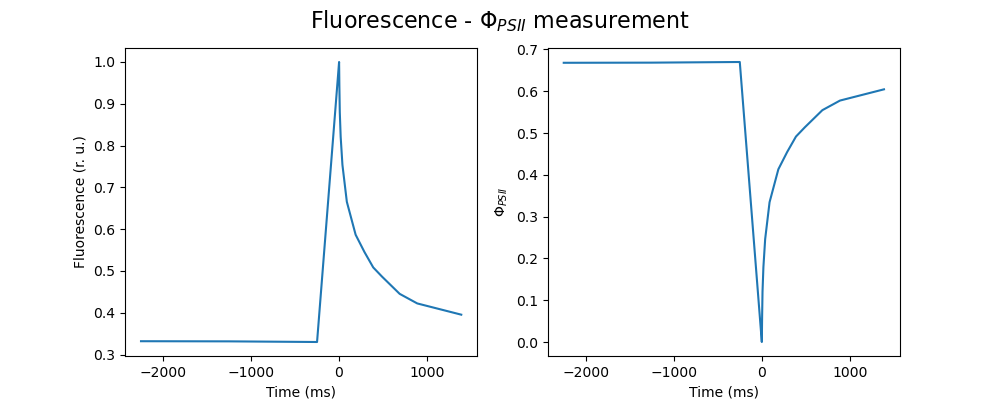

In [11]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,4))

figure_name = "Fluorescence - $Φ_{PSII}$ measurement"
fig.suptitle(figure_name, fontsize = 16)


ax1.plot(FvFm.Time,FvFm.Data.iloc[:,0]/max(FvFm.Data.iloc[:,0]))
ax2.plot(FvFm.Time,1- FvFm.Data.iloc[:,0]/max(FvFm.Data.iloc[:,0]))
ax1.set_xlabel("Time (ms)")
ax2.set_xlabel("Time (ms)")
ax1.set_ylabel("Fluorescence (r. u.)")
ax2.set_ylabel("$Φ_{PSII}$")

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

# ECS calibration

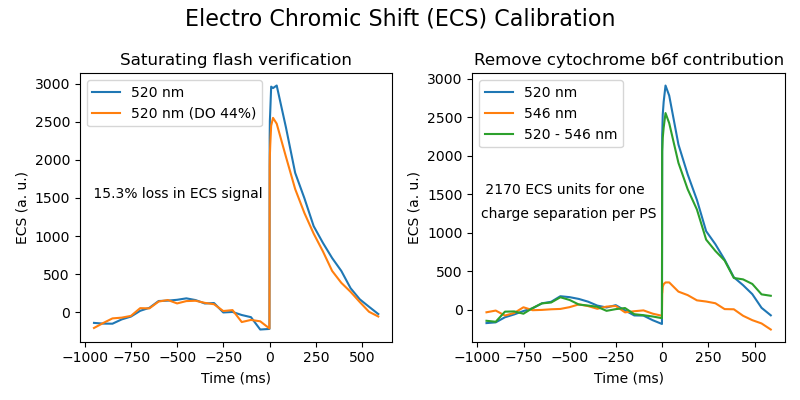

In [12]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
figure_name = "Electro Chromic Shift (ECS) Calibration"
fig.suptitle(figure_name, fontsize = 16)

ax1.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,0], label = "520 nm")
ax1.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,1], label = "520 nm (DO 44%)")
ax1.legend()
ax1.set_title("Saturating flash verification")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")

delta1 = ECS_flash.Data.iloc[20,0] - ECS_flash.Data.iloc[19,0]
delta2 = ECS_flash.Data.iloc[20,1] - ECS_flash.Data.iloc[19,1]
diff = 100 * (delta1 - delta2)/delta1

ax1.text( -980, 1500, f"{diff : .1f}% loss in ECS signal")

ax2.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,2], label = "520 nm")
ax2.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,3], label = "546 nm")
ax2.plot(ECS_flash.Time,ECS_flash.Data.iloc[:,4], label = "520 - 546 nm")
ax2.legend()
ax2.set_title("Remove cytochrome b6f contribution")
ax2.set_xlabel("Time (ms)")
ax2.set_ylabel("ECS (a. u.)")

delta1 = ECS_flash.Data.iloc[20,4] - ECS_flash.Data.iloc[19,4]

ax2.text( -980, 1500, f"{delta1 : .0f} ECS units for one")
ax2.text( -980, 1200, f"charge separation per PS")

fig.tight_layout()

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

# $E_{k}$ determination using JTS LEDs

C:\Users\Orlando\anaconda3\envs\PhD_environment\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
C:\Users\Orlando\anaconda3\envs\PhD_environment\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


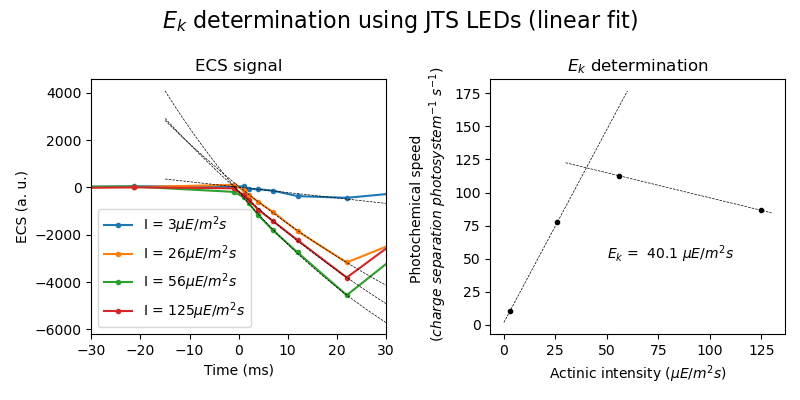

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
figure_name = "$E_{k}$ determination using JTS LEDs (linear fit)"
fig.suptitle(figure_name, fontsize = 16)

ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E55"], '-o', label = "I = $3 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E60"], '-o', label = "I = $26 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E45"], '-o', label = "I = $56 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E50"], '-o', label = "I = $125 µE/m^{2}s$", markersize = 3)

ax1.legend()
ax1.set_title("ECS signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")
ax1.set_xlim([-30,30])

start = -15
stop = 30
num = 50

xfit = []
yfit = []
param = []
vitesse = []

for i, k in enumerate(["E55","E60","E45","E50"]):
    xdata = Vitesse_photochimie_JTS.Time[20:26]
    ydata = Vitesse_photochimie_JTS.Data[k][20:26]
    popt, x, y = exp_decay_fit(xdata, ydata, start, stop, num)
    xfit.append(x)
    yfit.append(y)
    param.append(popt)
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.5)
    vitesse.append(param[i][0]/param[i][1])
    
intensity_array = [3, 26, 56, 125]

ax2.plot(intensity_array, 1000*(np.array(vitesse)/2170),'o', color ='k', markersize = 3)

popt1, x, y = lin_fit(intensity_array[0:2], 1000*(np.array(vitesse)/2170)[0:2], 0, 60, 50)
ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

popt2, x, y = lin_fit(intensity_array[2:], 1000*(np.array(vitesse)/2170)[2:], 30,130, 50)
ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

Ek = (popt2[1] - popt1[1])/(popt1[0] - popt2[0])

ax2.text( 50, 50, "$E_{k}$ = " + f"{Ek : .1f} " + "$µE/m^{2}s$")
    
    
ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity ($µE/m^{2}s$)")
ax2.set_ylabel("Photochemical speed \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")

fig.tight_layout()

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

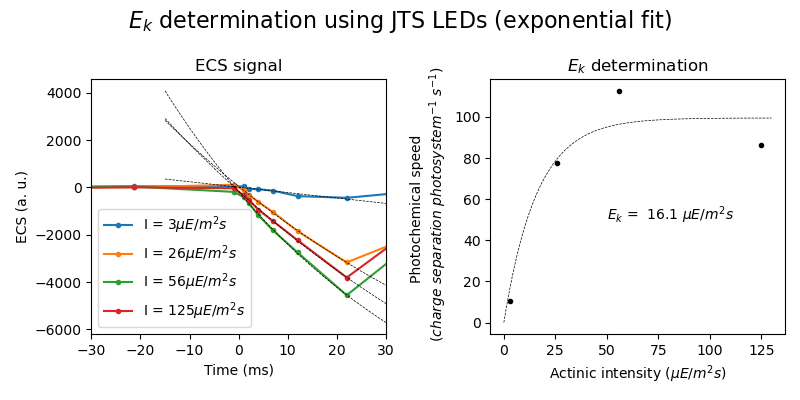

In [14]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8,4))
figure_name = "$E_{k}$ determination using JTS LEDs (exponential fit)"
fig.suptitle(figure_name, fontsize = 16)

ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E55"], '-o', label = "I = $3 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E60"], '-o', label = "I = $26 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E45"], '-o', label = "I = $56 µE/m^{2}s$", markersize = 3)
ax1.plot(Vitesse_photochimie_JTS.Time,Vitesse_photochimie_JTS.Data["E50"], '-o', label = "I = $125 µE/m^{2}s$", markersize = 3)

ax1.legend()
ax1.set_title("ECS signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")
ax1.set_xlim([-30,30])

start = -15
stop = 30
num = 50

xfit = []
yfit = []
param = []
vitesse = []

for i, k in enumerate(["E55","E60","E45","E50"]):
    xdata = Vitesse_photochimie_JTS.Time[20:26]
    ydata = Vitesse_photochimie_JTS.Data[k][20:26]
    popt, x, y = exp_decay_fit(xdata, ydata, start, stop, num)
    xfit.append(x)
    yfit.append(y)
    param.append(popt)
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.5)
    vitesse.append(param[i][0]/param[i][1])
    
intensity_array = [3, 26, 56, 125]

ax2.plot(intensity_array, 1000*(np.array(vitesse)/2170),'o', color ='k', markersize = 3)

popt, x, y = Ek_fit(intensity_array, 1000*(np.array(vitesse)/2170), 0, 130,100)

ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

Ek = popt[1]

ax2.text( 50, 50, "$E_{k}$ = " + f"{Ek : .1f} " + "$µE/m^{2}s$")
    
    
ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity ($µE/m^{2}s$)")
ax2.set_ylabel("Photochemical speed \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")

fig.tight_layout()

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

# $E_{k}$ determination using PWM

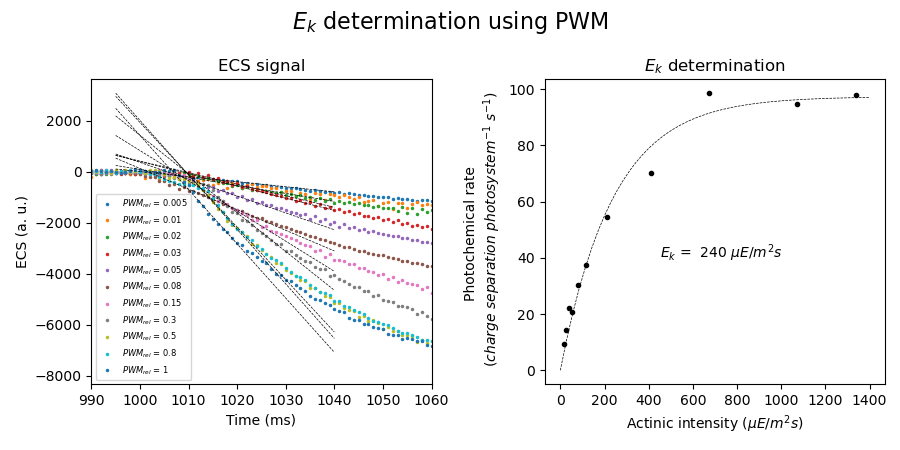

In [15]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (9,4.5))
figure_name = "$E_{k}$ determination using PWM"
fig.suptitle(figure_name, fontsize = 16)

PWM_rel = [0.005, 0.01, 0.02, 0.03, 0.05, 0.08, 0.15, 0.3, 0.5, 0.8, 1]
record_list = ["E124", "E121", "E125", "E126", "E127", "E128", "E129", "E130", "E131", "E132", "E133"]
Intensity = 1326 * np.asarray(PWM_rel) + 11.9

for i, k in enumerate(record_list) :
    ax1.plot(Vitesse_photochimie_PWM.Time,Vitesse_photochimie_PWM.Data[k], 'o', label = "$PWM_{rel}$ = " + f"{PWM_rel[i]}", 
             markersize = 1.5, linewidth = 1)

ax1.legend(prop={'size': 6})
ax1.set_title("ECS signal")
ax1.set_xlabel("Time (ms)")
ax1.set_ylabel("ECS (a. u.)")
ax1.set_xlim([990,1060])

start = 995
stop = 1040
num = 50

xfit = []
yfit = []
param = []
vitesse = []

for i, k in enumerate(record_list):
    xdata = Vitesse_photochimie_PWM.Time[110:120]
    ydata = Vitesse_photochimie_PWM.Data[k][110:120]
    popt, x, y = lin_fit(xdata, ydata, start, stop, num)
    xfit.append(x)
    yfit.append(y)
    param.append(popt)
    ax1.plot(xfit[i],yfit[i], '--', color ='k', linewidth = 0.5)
    vitesse.append(-param[i][0])
    

ax2.plot(Intensity, 1000*(np.array(vitesse)/2170),'o', color ='k', markersize = 3)

popt, x, y = Ek_fit(Intensity, 1000*(np.array(vitesse)/2170), 0, 1400,50, p0 = [100, 200])

ax2.plot(x,y, '--', color ='k', linewidth = 0.5)

Ek = popt[1]

ax2.text( 450, 40, "$E_{k}$ = " + f"{Ek : .0f} " + "$µE/m^{2}s$")
    
    
ax2.set_title("$E_{k}$ determination")
ax2.set_xlabel("Actinic intensity ($µE/m^{2}s$)")
ax2.set_ylabel("Photochemical rate \n ($charge$ $separation$ $photosystem^{-1}$ $s^{-1}$)")

fig.tight_layout()

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig.savefig(fig_folder + "/" + figure_name + ".png")

In [16]:
from scipy.signal import find_peaks

def FFT(Time, Signal):

    fs = 1 / (Time[1] - Time[0])
    freq = np.fft.fftfreq(len(Time), 1/fs) 
    F = freq[1:int(len(freq)/2)]
    ft = np.fft.fft(Signal)
    A = np.abs(ft[1:int(len(freq)/2)])
    P = np.angle(ft[1:int(len(freq)/2)])
    
    return F, A, P



def plot_spectrum(Time, Data, Rec, Actinic_freq, Offset, Amp, nb_period_show, plot_phase = True):
    figure_name = f"{Rec}, F = {Actinic_freq} Hz, Amplitude = {Offset : .2f}" + "$E_{k}$" + f" ± {Amp : .2f}" + "$E_{k}$, steady state"
    
    if plot_phase:
    
        fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (9, 3))
        fig.suptitle(figure_name)
        ax1.plot(Time, Data/1000)
        ax1.set_xlim([0, min(nb_period_show*(1/Actinic_freq), max(Time))])
        ax1.set_xlabel("Time (s)")
        ax1.set_ylabel("ECS (x $10^{3}$ a. u.)")

        F, A, P = FFT(Time, Data)
        peaks, _ = find_peaks(A, threshold= max(A)/100)

        ax2.plot(F, A/10000)
        ax2.plot(F[peaks],A[peaks]/10000, 'x', markersize = 3 )
        ax2.set_xlabel("Frequency (Hz)")
        ax2.set_ylabel("Magnitude x $10^{4}$")
        ax2.set_xlim([0, min(F[peaks[-1]]+0.1, max(F))])
        
        F_harmonics = F[peaks]
        P_harmonics = P[peaks]*180/np.pi
        P_harmonics = P_harmonics - P_harmonics[0]
        P_harmonics = np.where(P_harmonics < -180, P_harmonics + 360, P_harmonics)
        P_harmonics = np.where(P_harmonics > 180, P_harmonics - 360, P_harmonics)

        ax3.plot(F_harmonics,P_harmonics, 'o',  markersize = 4)
        ax3.set_xlabel("Frequency (Hz)")
        ax3.set_ylabel("Phase (degrees)")
        ax3.set_ylim([-200, 200])
        y_tick_labels = ['-180°','','-90°','', '0°','', '90°','', '180°']
        ax3.set_yticks(np.linspace(-180, 180, len(y_tick_labels)))
        ax3.set_yticklabels(y_tick_labels)
        ax3.grid(which = 'both')

        fig.tight_layout()

        return fig
    
    else:
        
        fig, (ax1, ax2) = plt.subplots(1,2, figsize = (6, 3))
        fig.suptitle(figure_name)
        ax1.plot(Time, Data/1000)
        ax1.set_xlim([0, min(nb_period_show*(1/Actinic_freq), max(Time))])
        ax1.set_xlabel("Time (s)")
        ax1.set_ylabel("ECS (x $10^{3}$ a. u.)")

        F, A, P = FFT(Time, Data)
        peaks, _ = find_peaks(A, threshold= max(A)/100)

        ax2.plot(F, A/10000)
        ax2.plot(F[peaks],A[peaks]/10000, 'x', markersize = 3 )
        ax2.set_xlabel("Frequency (Hz)")
        ax2.set_ylabel("Magnitude x $10^{4}$")
        ax2.set_xlim([0, min(F[peaks[-1]]+0.1, max(F))])

        fig.tight_layout()

        return fig
    

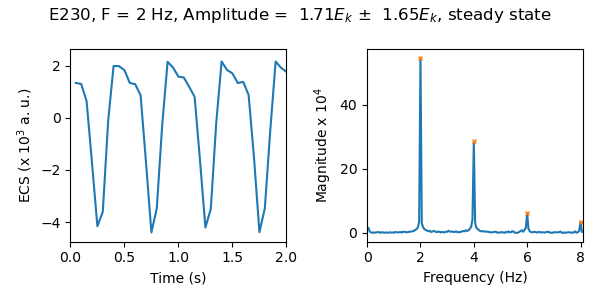

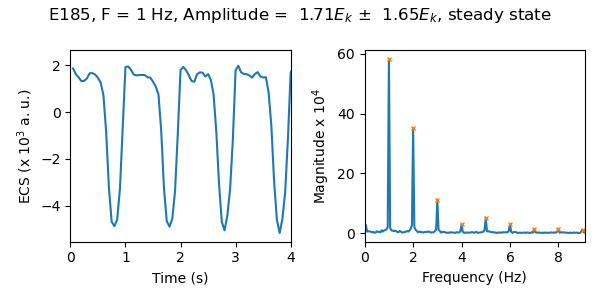

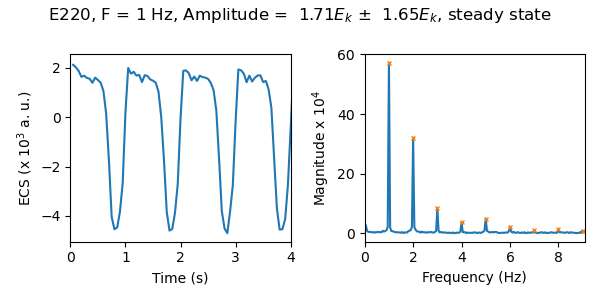

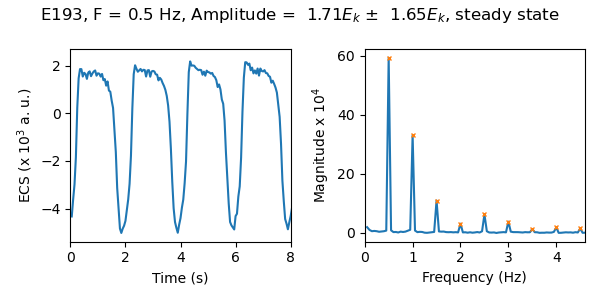

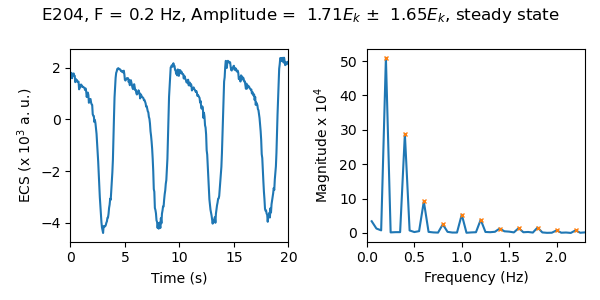

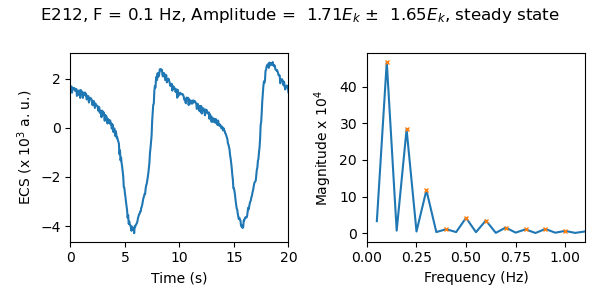

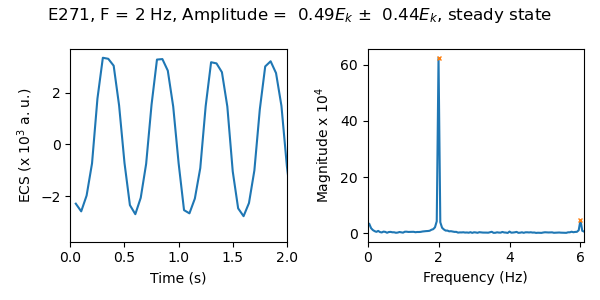

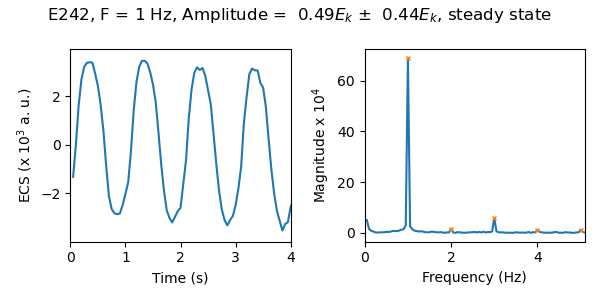

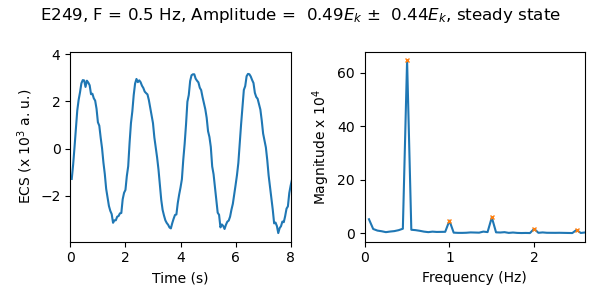

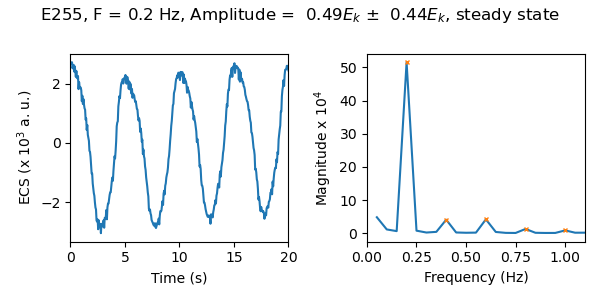

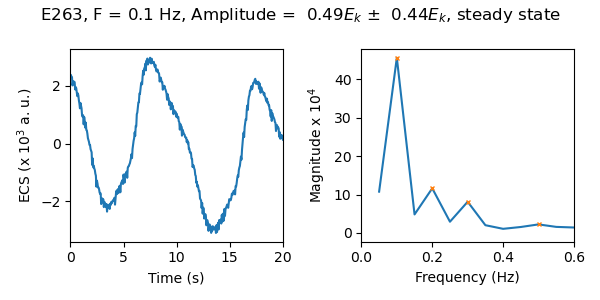

In [17]:
Time = Bode_diagram.Time/1000
record_list = ["E230", "E185", "E220", "E193", "E204", "E212", "E271", "E242", "E249", "E255", "E263"]
Actinic_freq = [2,1,1,0.5,0.2,0.1,2,1,0.5,0.2,0.1]
nb_period_show = 4
Offset = [0.3,0.3,0.3,0.3,0.3,0.3,0.08,0.08,0.08,0.08,0.08]
Amp = [0.29,0.29,0.29,0.29,0.29,0.29,0.07,0.07,0.07,0.07,0.07]
Offset_Ek = (1326 * np.asarray(Offset) + 11.9)/240
Amp_Ek = (1326 * np.asarray(Amp) + 11.9)/240

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

for i, k in enumerate(record_list):
    fig = plot_spectrum(Time, Bode_diagram.Data[k], k, Actinic_freq[i], Offset_Ek[i], Amp_Ek[i], nb_period_show, plot_phase=False)
    figure_name = f"{k}, F = {Actinic_freq[i]} Hz, Amplitude = {Offset[i]} ± {Amp[i]}" + " $PWM_{rel}$, steady state"
    fig.savefig(fig_folder + "/" + figure_name + ".png")

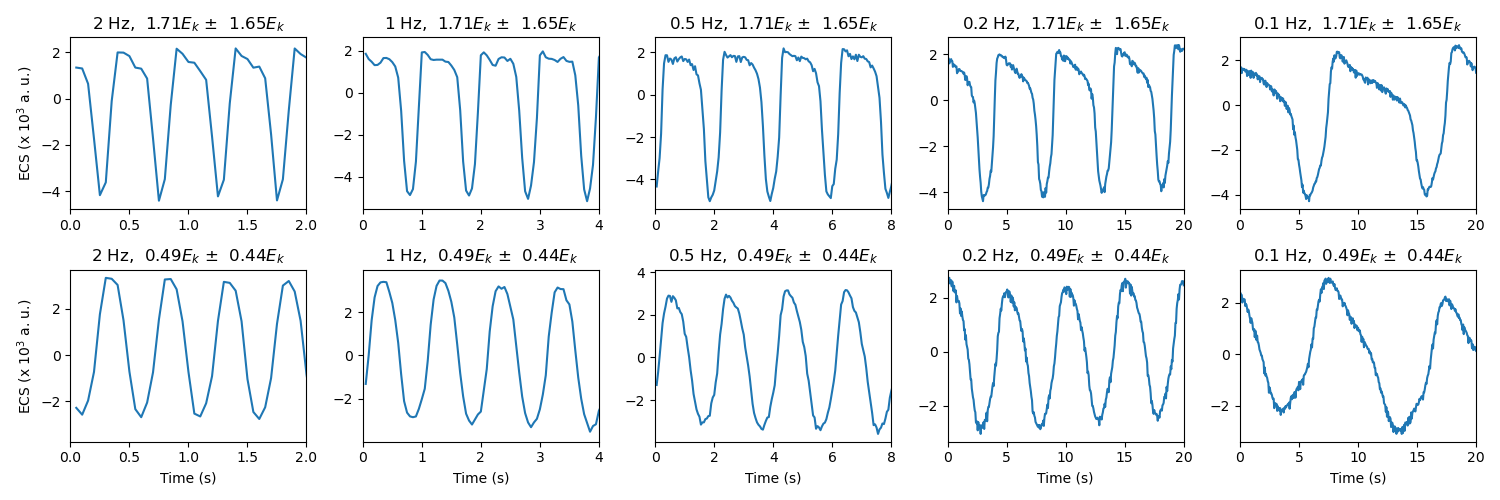

In [18]:
Time = Bode_diagram.Time/1000
record_list = ["E230", "E185", "E193", "E204", "E212", "E271", "E242", "E249", "E255", "E263"]
Actinic_freq = [2,1,0.5,0.2,0.1,2,1,0.5,0.2,0.1]
nb_period_show = 4
Offset = [0.3,0.3,0.3,0.3,0.3,0.08,0.08,0.08,0.08,0.08]
Amp = [0.29,0.29,0.29,0.29,0.29,0.07,0.07,0.07,0.07,0.07]
Offset_Ek = (1326 * np.asarray(Offset) + 11.9)/240
Amp_Ek = (1326 * np.asarray(Amp) + 11.9)/240

fig_folder = Bode_diagram.path + "/Figures"
if not os.path.isdir(fig_folder):
    os.mkdir(fig_folder)

fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(15, 5))

    
for i, ax in enumerate(axs.ravel()):
    ax.plot()
    ax.plot(Bode_diagram.Time/1000, Bode_diagram.Data[record_list[i]]/1000)
    ax.set_xlim([0, min(nb_period_show*(1/Actinic_freq[i]), max(Bode_diagram.Time/1000))])
    if i > 4:
        ax.set_xlabel("Time (s)")
    if i == 0 or i == 5:
        ax.set_ylabel("ECS (x $10^{3}$ a. u.)")
    ax.set_title(f"{Actinic_freq[i]} Hz, {Offset_Ek[i] : .2f}" + "$E_{k}$" + f" ± {Amp_Ek[i] : .2f}" + "$E_{k}$")
    
fig.tight_layout()
fig.savefig(fig_folder + "/" + "all_freq" + ".png")

(-10.0, 10.0)

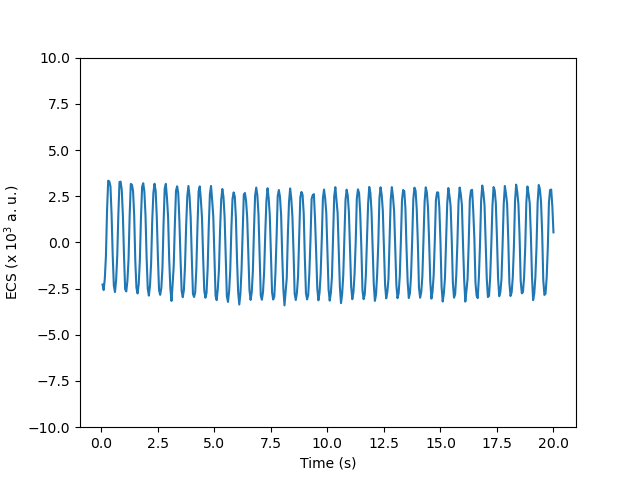

In [19]:
fig, ax = plt.subplots(1,1)

ax.plot(Bode_diagram.Time/1000, Bode_diagram.Data["E271"]/1000)
ax.set_xlabel("Time (s)")
ax.set_ylabel("ECS (x $10^{3}$ a. u.)")
ax.set_ylim([-10,10])



In [21]:
for i in ECS_pulse_list:
    manip.sub_experiments(f"ECS_pulse_{i}", i)
    

ValueError: Empty data passed with indices specified.

In [ ]:
ECS_pulse = ExperimentClass.Experiment("ECS_pulse", "JTS", local = manip.local, is_sub_experiment=True, parent_experiment_name="20230321_Ek_FvFm_Sinus")

In [22]:
ECS_pulse_list

['E28', 'E29', 'E30', 'E35']

In [23]:
i

'E28'